### Ecommerce Purchases Analysis

**Introduction**

Exploratory data analysis (EDA) is used by data specialists to analyze and investigate data sets, and understand the data before making any assumptions. 

EDA can help to quickly find any obvious errors, identify patterns within the data, detect anomalous events, and find interesting relations among the variables.

EDA helps stakeholders to ask the right questions, provide insights and observations, and help create new features that can be used for more sophisticated data analysis or modeling, machine learning and AI.

**Background**

This project will perform EDA on dummy eCommerce data for online purchases by customers in the US. A number of techniques will be applied to help understand:
- overall data quality
- volume of data
- types of data
- balance or imbalanced
- any interesting insights


In [4]:
# 1. Importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # visualisation
import matplotlib.dates as mdates
import seaborn as sns            # visualisation
%matplotlib inline 
sns.set_theme(color_codes=True)

from matplotlib.ticker import FormatStrFormatter
from matplotlib.dates import DateFormatter
from matplotlib import cm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pathlib import Path, PureWindowsPath
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose 

# split the dataset
from pandas import read_csv
from pandas.tseries.offsets import MonthEnd
from random import sample, randint, seed

import datetime
import os.path
from os import path
import warnings

# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=RuntimeWarning)

pd.set_option('display.max_columns', 500)

print('initialisation complete')

initialisation complete


In [5]:
# read in data downloaded from Kaggle
# https://www.kaggle.com/code/ahmedashrafahmed/ecommerce-purchases-analysis/input

ecom = pd.read_csv('../data/raw/Ecommerce Purchases')

ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [6]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [7]:
# count number of data rows
ecom.count()

Address             10000
Lot                 10000
AM or PM            10000
Browser Info        10000
Company             10000
Credit Card         10000
CC Exp Date         10000
CC Security Code    10000
CC Provider         10000
Email               10000
Job                 10000
IP Address          10000
Language            10000
Purchase Price      10000
dtype: int64

In [8]:
# check for any missing or null values
print(ecom.isnull().sum())

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64


In [9]:
ecom.describe()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302
std,2.256103e+15,1589.693035,29.015836
min,6.040186e+10,0.000000,0.000000
25%,3.056322e+13,280.000000,25.150000
50%,8.699942e+14,548.000000,50.505000
75%,4.492298e+15,816.000000,75.770000
max,6.012000e+15,9993.000000,99.990000


In [10]:
# remove unhelpful columns
ecom_df = ecom.copy()
ecom_df = ecom_df.drop(['Credit Card', 'CC Exp Date', 'CC Security Code', 'Email', 'IP Address'], axis=1)

ecom_df.head()	

,Address,Lot,AM or PM,Browser Info,Company,CC Provider,Job,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,JCB 16 digit,"Scientist, product/process development",el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",Mastercard,Drilling engineer,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",JCB 16 digit,Customer service manager,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",Discover,Drilling engineer,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",Diners Club / Carte Blanche,Fine artist,es,77.82


In [11]:
# temp_df = ecom_df.copy()

ecom_df['Browser_Name'] = [x.split('/')[0] for x in ecom_df['Browser Info']]

ecom_df['Job_Title'] = [x.split(',')[0] for x in ecom_df['Job']]

ecom_df = ecom_df.drop(['Browser Info','Job'], axis=1)

ecom_df.head()

,Address,Lot,AM or PM,Company,CC Provider,Language,Purchase Price,Browser_Name,Job_Title
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Martinez-Herman,JCB 16 digit,el,98.14,Opera,Scientist
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,"Fletcher, Richards and Whitaker",Mastercard,fr,70.73,Opera,Drilling engineer
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,"Simpson, Williams and Pham",JCB 16 digit,de,0.95,Mozilla,Customer service manager
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,"Williams, Marshall and Buchanan",Discover,es,78.04,Mozilla,Drilling engineer
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,"Brown, Watson and Andrews",Diners Club / Carte Blanche,es,77.82,Opera,Fine artist


<Axes: xlabel='Language', ylabel='Purchase Price'>

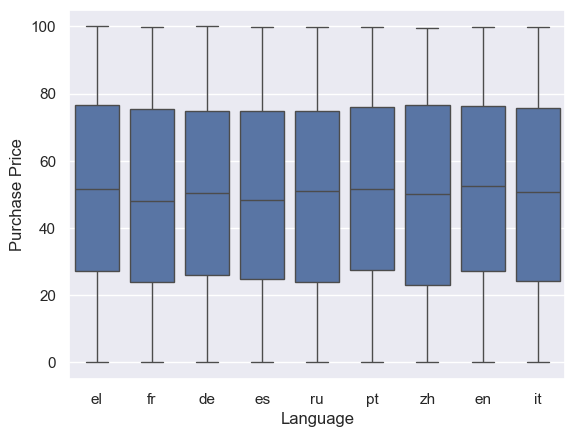

In [12]:
# visualise purchase price to the different languagues
sns.boxplot(data=ecom_df, x='Language', y='Purchase Price')

Text(0.5, 0, 'Language')

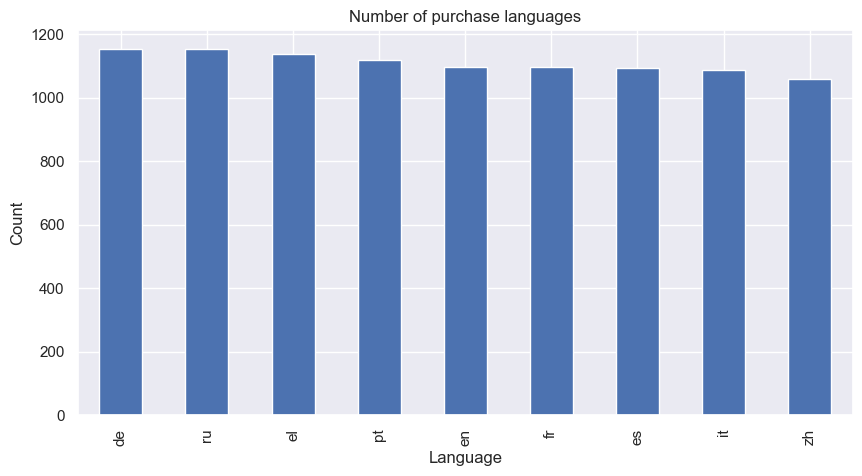

In [13]:
# Histogram of the frequency of occurrence of variables in an interval

ecom_df.Language.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of purchase languages")
plt.ylabel('Count')
plt.xlabel('Language')

Text(0.5, 0, 'Job_Title')

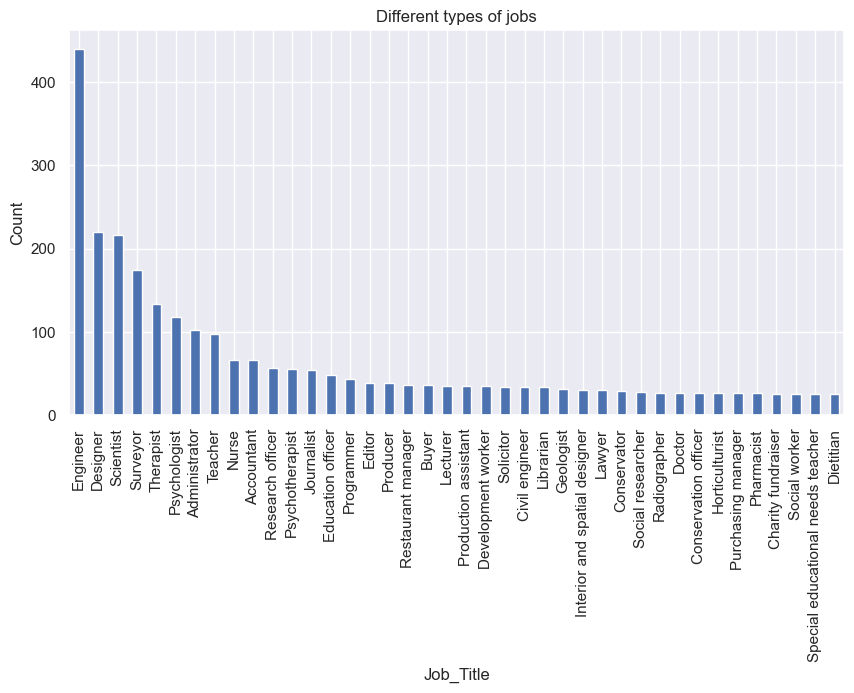

In [14]:
# Histogram of the frequency of different job titles

ecom_df.Job_Title.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Different types of jobs")
plt.ylabel('Count')
plt.xlabel('Job_Title')

Text(0.5, 0, 'Browser_Name')

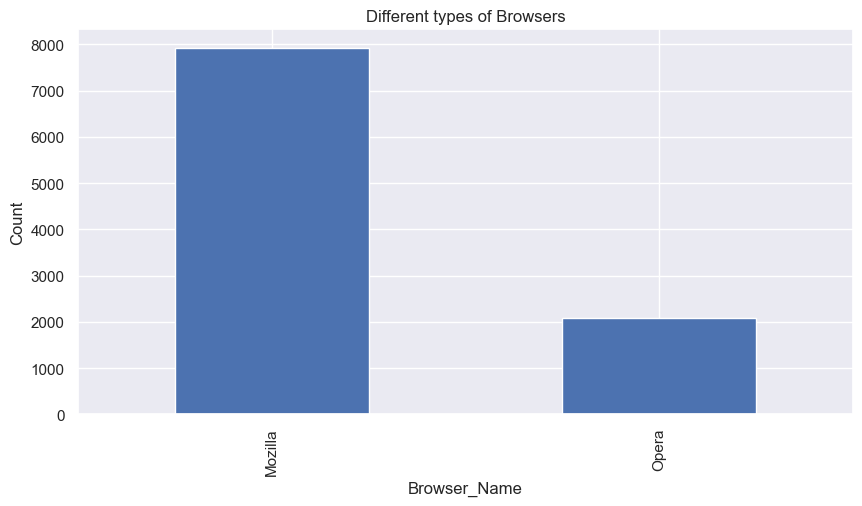

In [15]:
# Histogram of the frequency of different browsers

ecom_df.Browser_Name.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Different types of Browsers")
plt.ylabel('Count')
plt.xlabel('Browser_Name')

Text(0.5, 0, 'AM or PM')

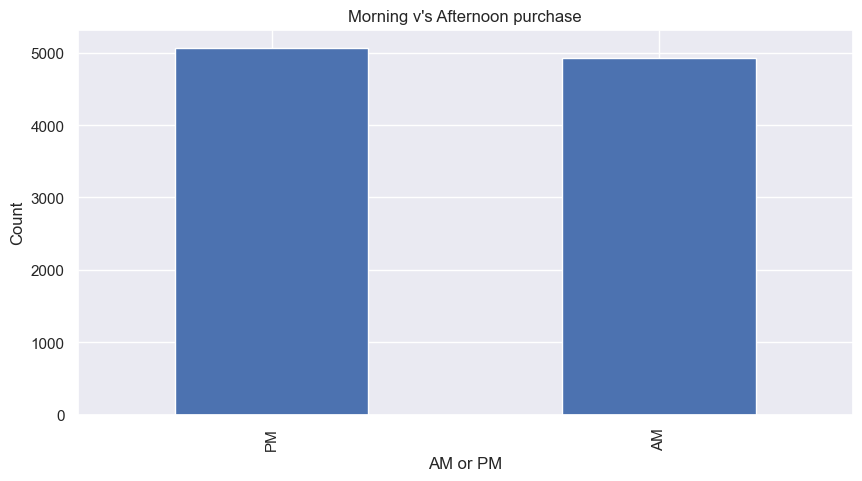

In [16]:
# Histogram of the frequency of morning v's afternoon

ecom_df['AM or PM'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Morning v's Afternoon purchase")
plt.ylabel('Count')
plt.xlabel('AM or PM')

In [17]:
# Function to group Purchase Price

def fn_Price_Group(purch_price):

    price_result = '0'

    if purch_price <= 1:
        price_result = '<= 1'
    elif purch_price <= 10:
        price_result = '<= 10'
    elif purch_price <= 20:
        price_result = '<= 20'
    elif purch_price <= 30:
        price_result = '<= 30'
    elif purch_price <= 40:
        price_result = '<= 40'
    elif purch_price <= 50:
        price_result = '<= 50'
    elif purch_price <= 60:
        price_result = '<= 60'
    elif purch_price <= 70:
        price_result = '<= 70'
    elif purch_price <= 80:
        price_result = '<= 80'
    elif purch_price <= 90:
        price_result = '<= 90'
    elif purch_price <= 100:
        price_result = '<= 100'
    else: 
        price_result = 'n/a'

    return price_result

In [18]:
# use list comprehension & function to group 'Purchase Price' into buckets
ecom_df['Price_Group'] = [fn_Price_Group(x) for x in ecom_df['Purchase Price']]

ecom_df.head()

,Address,Lot,AM or PM,Company,CC Provider,Language,Purchase Price,Browser_Name,Job_Title,Price_Group
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Martinez-Herman,JCB 16 digit,el,98.14,Opera,Scientist,<= 100
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,"Fletcher, Richards and Whitaker",Mastercard,fr,70.73,Opera,Drilling engineer,<= 80
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,"Simpson, Williams and Pham",JCB 16 digit,de,0.95,Mozilla,Customer service manager,<= 1
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,"Williams, Marshall and Buchanan",Discover,es,78.04,Mozilla,Drilling engineer,<= 80
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,"Brown, Watson and Andrews",Diners Club / Carte Blanche,es,77.82,Opera,Fine artist,<= 80


Text(0.5, 0, 'Price_Group')

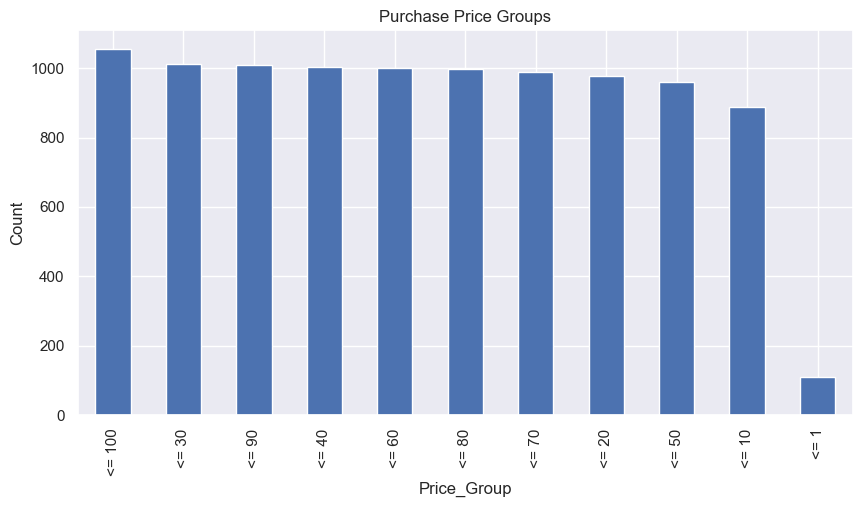

In [19]:
# Histogram of the frequency of Purchase Price Groups

ecom_df['Price_Group'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Purchase Price Groups")
plt.ylabel('Count')
plt.xlabel('Price_Group')

In [20]:
# Investigate Price Value - low, med, high

def fn_Price_Value(purch_price):

    price_result = ''

    if purch_price <= 30:
        price_result = 'low < 30'
    elif purch_price <= 70:
        price_result = 'med 31-70'
    elif purch_price <= 100:
        price_result = 'high 80+'
    else: 
        price_result = 'n/a'

    return price_result

In [21]:
# use list comprehension & function to group 'Purchase Price' into buckets
ecom_df['Price_Value'] = [fn_Price_Value(x) for x in ecom_df['Purchase Price']]

ecom_df.head()

,Address,Lot,AM or PM,Company,CC Provider,Language,Purchase Price,Browser_Name,Job_Title,Price_Group,Price_Value
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Martinez-Herman,JCB 16 digit,el,98.14,Opera,Scientist,<= 100,high 80+
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,"Fletcher, Richards and Whitaker",Mastercard,fr,70.73,Opera,Drilling engineer,<= 80,high 80+
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,"Simpson, Williams and Pham",JCB 16 digit,de,0.95,Mozilla,Customer service manager,<= 1,low < 30
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,"Williams, Marshall and Buchanan",Discover,es,78.04,Mozilla,Drilling engineer,<= 80,high 80+
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,"Brown, Watson and Andrews",Diners Club / Carte Blanche,es,77.82,Opera,Fine artist,<= 80,high 80+


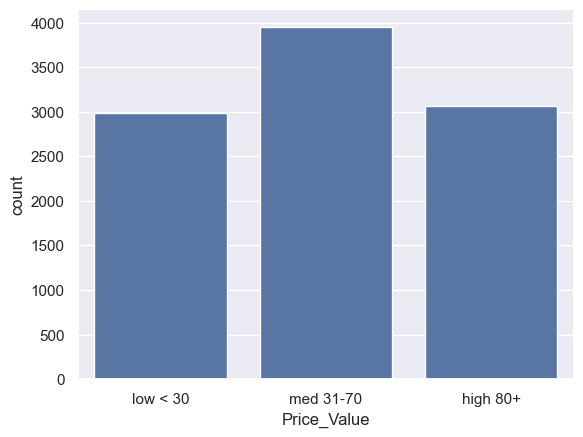

In [22]:
# Histogram of the frequency of Purchase Value

# set categorical order
ecom_df['Price_Value'] = pd.Categorical(ecom_df['Price_Value'], 
                                        categories=['low < 30', 'med 31-70', 'high 80+'], 
                                        ordered=True)

ax = sns.countplot(x='Price_Value', data=ecom_df)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'JCB 16 digit'),
  Text(1, 0, 'VISA 16 digit'),
  Text(2, 0, 'JCB 15 digit'),
  Text(3, 0, 'American Express'),
  Text(4, 0, 'Maestro'),
  Text(5, 0, 'Voyager'),
  Text(6, 0, 'Discover'),
  Text(7, 0, 'Mastercard'),
  Text(8, 0, 'VISA 13 digit'),
  Text(9, 0, 'Diners Club / Carte Blanche')])

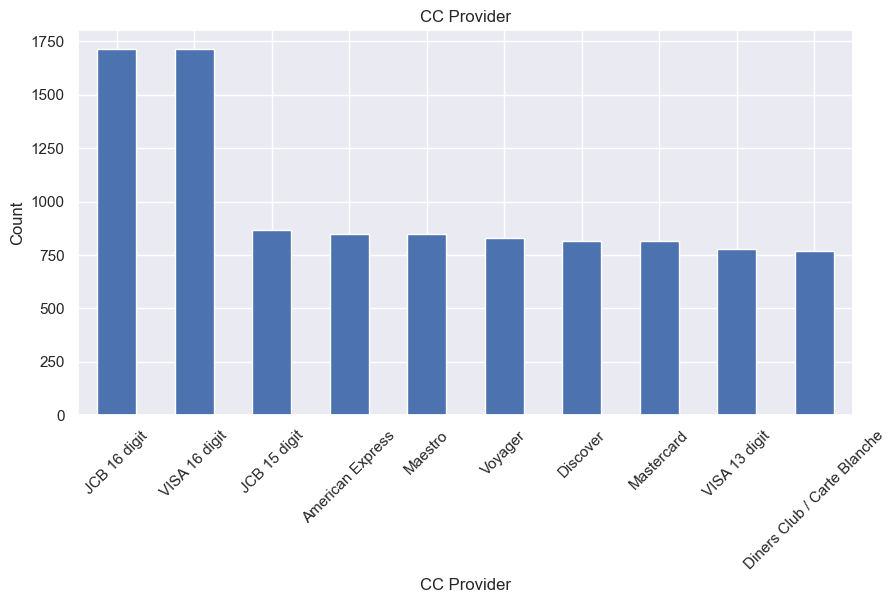

In [23]:
# Histogram of the frequency of CC Provider

ecom_df['CC Provider'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("CC Provider")
plt.ylabel('Count')
plt.xlabel('CC Provider')
plt.xticks(rotation = 45)

In [24]:
# Explore Address - sample: 74428 Brian Trail Suite 639\nAllenburgh, KY 33519
# newline char \n - is the start of address, format: suburb, state zipcode

ecomm_addr = ecom_df.copy()

# extract address, format: suburb, state zipcode
ecomm_addr['Suburb_Prep'] = [x.split('\n')[1] for x in ecomm_addr['Address']]

# extract state zipcode - get everything to the right of the separating comma
ecomm_addr['State_Prep'] = [x.split(',')[1] if x.find(',') > -1 else x for x in ecomm_addr['Suburb_Prep'] ]

# extract state only - there is a space at the very start, so get index 1
ecomm_addr['State'] = [x.split(' ')[1] for x in ecomm_addr['State_Prep'] ]

# ecomm_addr['Suburb'] = [x.split(',')[0] for x in ecomm_addr['Suburb_Prep']]
# ecomm_addr.value_counts('State_Prep', ascending=False)

# final value counts of state only
ecomm_addr.value_counts('State', ascending=False)

State
AP    376
AA    351
AE    331
IN    183
VI    178
     ... 
CO    133
SC    131
VT    131
NM    130
TN    127
Name: count, Length: 62, dtype: int64

Text(0.5, 0, 'State')

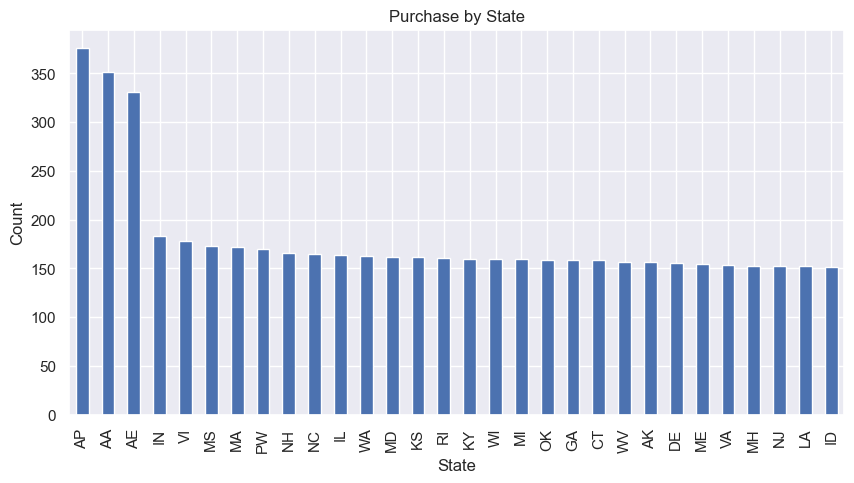

In [25]:
# Histogram of the frequency of states

ecomm_addr['State'].value_counts().nlargest(40)[0:30].plot(kind='bar', figsize=(10,5))
plt.title("Purchase by State")
plt.ylabel('Count')
plt.xlabel('State')

In [26]:
# count the number of purchases by State - notice the top 3 values do not match actual US state codes, ignore these when plotting
state_count = ecomm_addr['State'].value_counts().rename_axis('State').to_frame('No. Purch').reset_index()
state_count

,State,No. Purch
0,AP,376
1,AA,351
2,AE,331
3,IN,183
4,VI,178
...,...,...
57,CO,133
58,SC,131
59,VT,131
60,NM,130


In [27]:
# import plotly.express module
# this module is used to create entire figures at once
import plotly.io as pio
import plotly.express as px

# create figure
# ignore 3 highest values as state codes do not exist & map won't work otherwise
fig = px.choropleth(state_count[3:], locations='State', locationmode="USA-states", color='No. Purch', scope="usa")

fig.update_layout(
    title="Purchase by US State",
    autosize=False,
    width=900,
    height=500
)

fig.show()

## References ##
Dummy Source Data https://www.kaggle.com/code/ahmedashrafahmed/ecommerce-purchases-analysis/input<br>
Exploratory Data Analysis https://www.ibm.com/topics/exploratory-data-analysis<br>
Plotly Choropleth Maps https://www.geeksforgeeks.org/choropleth-maps-using-plotly-in-python/#google_vignette<br>